In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [6]:
Score=pd.read_csv("50_Startups.csv")
Score.shape
Score.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
X=Score.drop('Profit',axis=1)
X=X.drop('State',axis=1)
y=Score['Profit']
print(X,y)

    R&D Spend  Administration  Marketing Spend
0   165349.20       136897.80        471784.10
1   162597.70       151377.59        443898.53
2   153441.51       101145.55        407934.54
3   144372.41       118671.85        383199.62
4   142107.34        91391.77        366168.42
5   131876.90        99814.71        362861.36
6   134615.46       147198.87        127716.82
7   130298.13       145530.06        323876.68
8   120542.52       148718.95        311613.29
9   123334.88       108679.17        304981.62
10  101913.08       110594.11        229160.95
11  100671.96        91790.61        249744.55
12   93863.75       127320.38        249839.44
13   91992.39       135495.07        252664.93
14  119943.24       156547.42        256512.92
15  114523.61       122616.84        261776.23
16   78013.11       121597.55        264346.06
17   94657.16       145077.58        282574.31
18   91749.16       114175.79        294919.57
19   86419.70       153514.11             0.00
20   76253.86

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
print(regressor.intercept_)
print(regressor.coef_)

54071.87574599082
[ 0.80377928 -0.06792917  0.03124155]


In [14]:
y_pred=regressor.predict(X_test)

In [15]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
13,134307.35,126703.027165
39,81005.76,84894.750816
30,99937.59,98893.418160
45,64926.08,46501.708150
17,125370.37,129128.397344
48,35673.41,50992.694863
26,105733.54,109016.553658
25,107404.34,100878.464145
32,97427.84,97700.596386
19,122776.86,113106.152922


from matplotlib import pyplot as plt
df['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

In [16]:
from sklearn.metrics  import mean_squared_error,r2_score
print('Coefficient:\n',regressor.coef_)
print('MSE: %.2f'%mean_squared_error(y_test,y_pred))
print('r2_score: %.2f'%r2_score(y_test,y_pred))

Coefficient:
 [ 0.80377928 -0.06792917  0.03124155]
MSE: 80926321.22
r2_score: 0.90


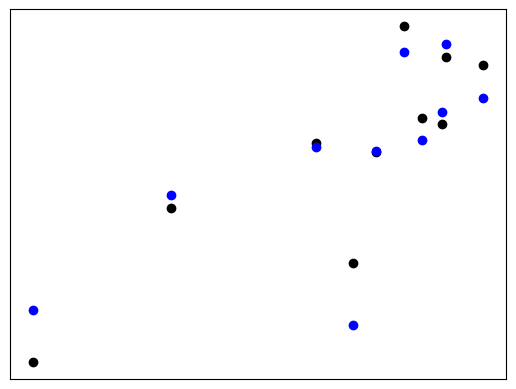

In [17]:
plt.scatter(X_test['Administration'],y_test,color='black')
plt.scatter(X_test['Administration'],y_pred,color='blue')
plt.xticks(())
plt.yticks(())
plt.show()

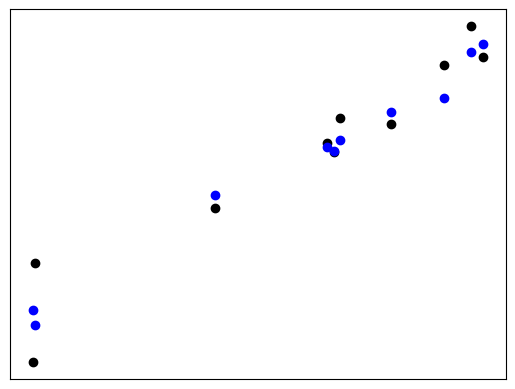

In [18]:
plt.scatter(X_test['R&D Spend'],y_test,color='black')
plt.scatter(X_test['R&D Spend'],y_pred,color='blue')
plt.xticks(())
plt.yticks(())
plt.show()